In [1]:
import torch
print(torch.__version__)
# Gordon commented this out since I have 1.6 installed locally (in the same virtualenv as the rest of assignment2)
# assert '.'.join(torch.__version__.split('.')[:2]) == '1.4'
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torch.nn.functional as F  # useful stateless functions

import torchvision.datasets as dset
import torchvision.transforms as T

import math
import numpy as np

from src.model_utils import *
import src.present_results as present_results
import src.train as train
# TODO implement visualize_grid that was in cs231n code

# Gordon added these
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# The torchvision.transforms package provides tools for preprocessing data
# and for performing data augmentation; here we set up a transform to
# preprocess the data by subtracting the mean RGB value and dividing by the
# standard deviation of each RGB value; we've hardcoded the mean and std.
transform = T.Compose([
                T.ToTensor(),
                T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
            ])

1.6.0


In [2]:
model_results_cache = {}
model_defs = train.search_models(model_results_cache)

Training ('3x3_64_64_max2_128_128_max2_256_256_max2_512__glbmax_BN_relu_dropout_fc_ALLBN(bias-only)_batch64_dup0', TrainParams(transform=Compose(
    RandomHorizontalFlip(p=0.5)
    RandomPerspective(p=0.36787944117144233)
    RandomWeightedChoice([RandomCrop(size=(28, 28), padding=None), RandomCrop(size=(32, 24), padding=None), RandomCrop(size=(24, 32), padding=None), RandomCrop(size=(32, 32), padding=None)], [0.33, 0.0, 0.33, 0.34])
    Resize(size=(32, 32), interpolation=PIL.Image.BILINEAR)
    ToTensor()
    Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
), use_hflip_in_accuracy_eval=False, num_train=42000, num_val=8000, random_seed=0, num_epochs=100, distortion_scale=0.36787944117144233, p_dropout=0.0820849986238988, head_params=ComponentParams(weight_decay=0.6065306597126334, optimizer='AdamW', optimizer_params={'lr': 4e-05, 'betas': (0.85, 0.99)}, lr_scheduler='OneCycleLR', lr_scheduler_params={'max_lr': 0.001, 'total_steps': 65700, 'pct_start': 0.3, 'anne

After epoch 42 with head lr=0.0009172681408350787, momentum=0.8582732190093681: train accuracy: 0.836  val accuracy: 0.8021  epoch duration: 12.06680941581726
After epoch 43 with head lr=0.0009044888023840652, momentum=0.8595511579662253: train accuracy: 0.886  val accuracy: 0.8486  epoch duration: 12.064659595489502
After epoch 44 with head lr=0.0008908948813432172, momentum=0.8609105555079003: train accuracy: 0.867  val accuracy: 0.8219  epoch duration: 12.067912578582764
After epoch 45 with head lr=0.0008765137540603966, momentum=0.8623486739886562: train accuracy: 0.892  val accuracy: 0.857  epoch duration: 12.0622079372406
After epoch 46 with head lr=0.0008613743822120726, momentum=0.8638626172292616: train accuracy: 0.89  val accuracy: 0.8501  epoch duration: 12.049891471862793
After epoch 47 with head lr=0.0008455072544783602, momentum=0.8654493363495094: train accuracy: 0.893  val accuracy: 0.851  epoch duration: 12.049163818359375
After epoch 48 with head lr=0.0008289443251428

After epoch 94 with head lr=1.2532394692031279e-05, momentum=0.9487471555194189: train accuracy: 0.999  val accuracy: 0.9361  epoch duration: 12.045331716537476
After epoch 95 with head lr=8.033076090761829e-06, momentum=0.9491970891792805: train accuracy: 1.0  val accuracy: 0.9346  epoch duration: 12.060863256454468
After epoch 96 with head lr=4.524517429727714e-06, momentum=0.949547946448813: train accuracy: 1.0  val accuracy: 0.936  epoch duration: 12.045644283294678
After epoch 97 with head lr=2.0137844791439395e-06, momentum=0.9497990207481686: train accuracy: 1.0  val accuracy: 0.9345  epoch duration: 12.045005798339844
After epoch 98 with head lr=5.059335210381356e-07, momentum=0.9499498064471219: train accuracy: 1.0  val accuracy: 0.9353  epoch duration: 12.04673981666565
After epoch 99 with head lr=4.001166571058606e-09, momentum=0.9499999998833424: train accuracy: 1.0  val accuracy: 0.9354  epoch duration: 12.048517942428589
Training ('3x3_64_64_max2_128_128_max2_256_256_max2

After epoch 36 with head lr=0.0009755178004389267, momentum=0.8524482297490263: train accuracy: 0.854  val accuracy: 0.8127  epoch duration: 12.052856206893921
After epoch 37 with head lr=0.00096810556053866, momentum=0.8531894567039607: train accuracy: 0.877  val accuracy: 0.8367  epoch duration: 12.048716068267822
After epoch 38 with head lr=0.0009597506223639211, momentum=0.8540249538634233: train accuracy: 0.828  val accuracy: 0.7946  epoch duration: 12.048920154571533
After epoch 39 with head lr=0.0009504698116482968, momentum=0.8549530386473249: train accuracy: 0.864  val accuracy: 0.8293  epoch duration: 12.051105976104736
After epoch 40 with head lr=0.0009402818187094537, momentum=0.8559718420164226: train accuracy: 0.876  val accuracy: 0.839  epoch duration: 12.049347877502441
After epoch 41 with head lr=0.0009292071608093254, momentum=0.8570793122363164: train accuracy: 0.886  val accuracy: 0.8536  epoch duration: 12.061731100082397
After epoch 42 with head lr=0.0009172681408

After epoch 88 with head lr=5.96898112893977e-05, momentum=0.9440313949966401: train accuracy: 0.997  val accuracy: 0.9289  epoch duration: 12.024531841278076
After epoch 89 with head lr=4.9504549723437804e-05, momentum=0.9450499252273571: train accuracy: 0.998  val accuracy: 0.931  epoch duration: 12.021450281143188
After epoch 90 with head lr=4.022653006894981e-05, momentum=0.9459777309040286: train accuracy: 0.998  val accuracy: 0.9289  epoch duration: 12.01585340499878
After epoch 91 with head lr=3.187443702277449e-05, momentum=0.9468129435494967: train accuracy: 0.999  val accuracy: 0.9306  epoch duration: 12.02340817451477
After epoch 92 with head lr=2.4465090588788322e-05, momentum=0.9475538811566457: train accuracy: 0.999  val accuracy: 0.9336  epoch duration: 12.01932406425476
After epoch 93 with head lr=1.801341220465416e-05, momentum=0.9481990515757408: train accuracy: 0.999  val accuracy: 0.9337  epoch duration: 12.014412879943848
After epoch 94 with head lr=1.2532394692031

| 3x3_64_64_max2_128_128_max2_256_256_max2_512__glbmax_BN_relu_dropout_fc_ALLBN(bias-only)_batch64_dup0, TrainParams(transform=Compose(RandomHorizontalFlip(p=0.5)RandomPerspective(p=0.36787944117144233)RandomWeightedChoice([RandomCrop(size=(28,28),padding=None),RandomCrop(size=(32,24),padding=None),RandomCrop(size=(24,32),padding=None),RandomCrop(size=(32,32),padding=None)],[0.33,0.0,0.33,0.34])Resize(size=(32,32),interpolation=PIL.Image.BILINEAR)ToTensor()Normalize(mean=(0.4914,0.4822,0.4465),std=(0.2023,0.1994,0.201))),use_hflip_in_accuracy_eval=False,num_train=42000,num_val=8000,random_seed=0,num_epochs=100,distortion_scale=0.36787944117144233,p_dropout=0.0820849986238988,head_params=ComponentParams(weight_decay=0.6065306597126334,optimizer='AdamW',optimizer_params={'lr':4e-05,'betas':(0.85,0.99)},lr_scheduler='OneCycleLR',lr_scheduler_params={'max_lr':0.001,'total_steps':65700,'pct_start':0.3,'anneal_strategy':'cos','cycle_momentum':True,'base_momentum':0.85,'max_momentum':0.95,'di

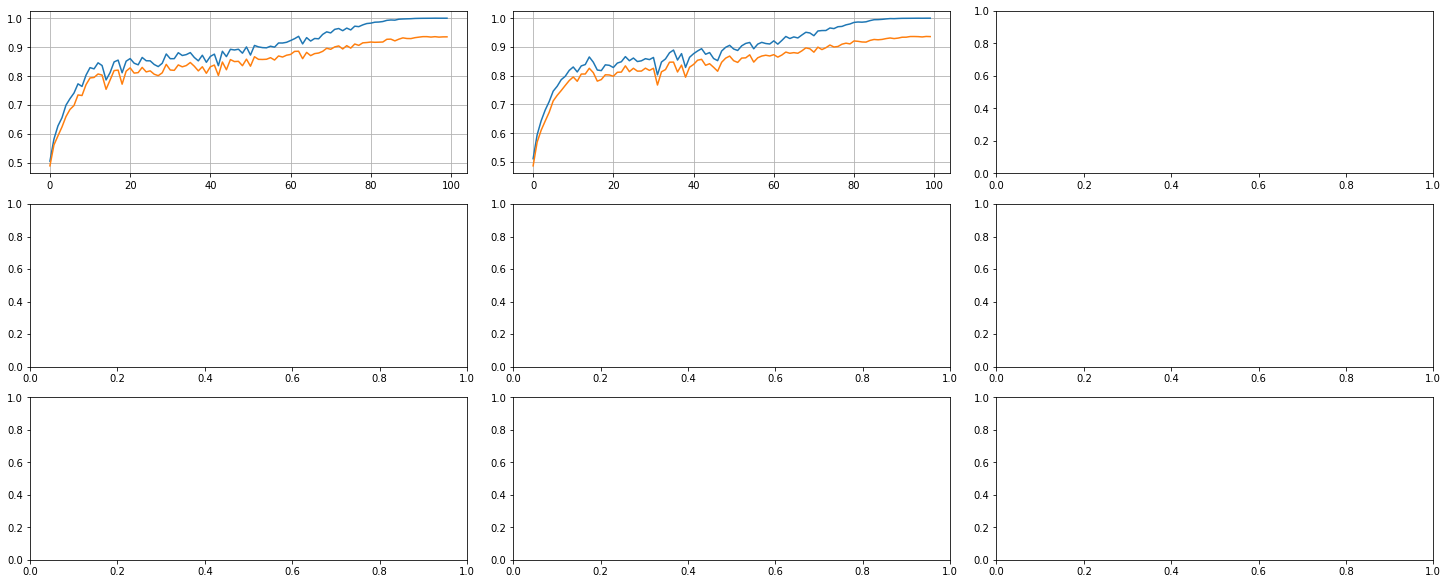

In [3]:
all_train_results = list(model_results_cache.values())

for results in all_train_results:
    results_string = present_results.get_training_results_string(results)
    print(results_string)
    
accuracy_fig = present_results.get_train_val_accuracies_fig(all_train_results)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model, _, _, _ = model_results_cache["3x3_64_64_128_128_256_256_256_glbav_fc_str1121212", TrainParams(l2=0)]
tr_learned_features, tr_ground_truth   = cs231n.pytorch_train_best_model.learned_features(model, loader_train, NUM_TRAIN)
val_learned_features, val_ground_truth = cs231n.pytorch_train_best_model.learned_features(model, loader_val, NUM_VAL)

scaler = StandardScaler().fit(tr_learned_features)
tr_learned_features_preprocessed = scaler.transform(tr_learned_features)
val_learned_features_preprocessed = scaler.transform(val_learned_features)

print(tr_learned_features_preprocessed.shape)
print(tr_learned_features_preprocessed.std(axis=0))
print(tr_ground_truth)

logistic_regression_model = LogisticRegression(random_state=0, solver='saga', tol=0.005, max_iter=100, penalty='l1', C=np.exp(-0.75))

logistic_regression_model.fit(tr_learned_features_preprocessed, tr_ground_truth)
val_predictions = logistic_regression_model.predict(val_learned_features_preprocessed)
score = accuracy_score(y_true=val_ground_truth,
                       y_pred=val_predictions)
print(score)

TypeError: __init__() got an unexpected keyword argument 'l2'

Files already downloaded and verified
Files already downloaded and verified
(3,)


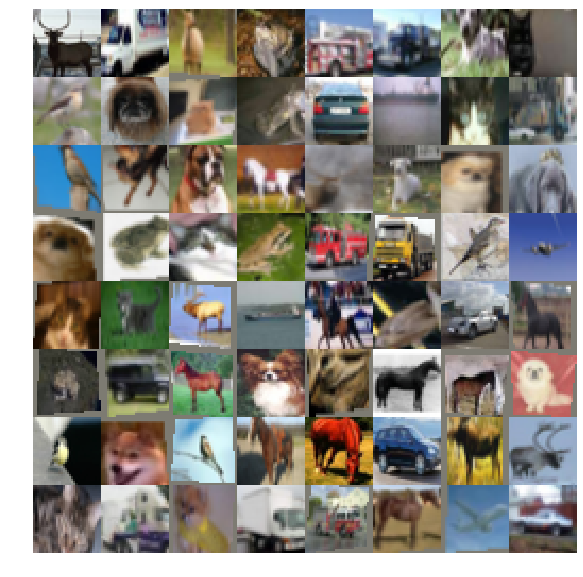

In [44]:
#transform = cs231n.pytorch_train_best_model.get_random_crop_transform((32, 32))
#transform = get_random_crop_transform_with_hflip_with_noise(p_crop=1, crop_size=(24, 24), p_noise=0, noise_std=0.1)
#transform = get_24_28_32_random_crop_transform_with_hflip()
#transform = get_transform_hflip_rotate_crop(p_crop=0, crop_size=(28, 28), p_rotation=0.5, degrees=20)

def convert_to_uint8_images(array):
    print(array.min(axis=(0, 1, 2)).shape)
    result = array - array.min(axis=(0, 1, 2))           
    result *= 255 / result.max(axis=(0, 1, 2))
    return result.astype('uint8')

def show_transform(transform):
    datasets = get_datasets(transform)
    dataloaders = get_dataloaders(datasets, num_train=42000, num_val=8000, random_seed=0)
    for batch_images, batch_labels in dataloaders["train_augmented"]:
        numpy_images = batch_images.cpu().numpy().transpose(0, 2, 3, 1)
        uint8_images = convert_to_uint8_images(numpy_images)
        grid = present_results.to_image_grid(uint8_images, 8)
        plt.imshow(grid)
        plt.axis('off')
        plt.gcf().set_size_inches(10, 10)
        plt.show()
        break

#show_transform(get_transform_hflip_crop_jpg(p_crop=0.5, crop_size=(28, 28),
#                                            p_jpg=0.0, jpg_quality=65))
#show_transform(get_transform_hflip_weighted_crop(crop_weights=[0.0, 0.75, 0, 0.25],
#                                                 crop_sizes=[(28, 28), (32, 2), (2, 32), (32, 32)]))
#show_transform(get_transform_hflip_rotate_weighted_crop(p_rotation=0.5, degrees=10, crop_weights=[1.0], crop_sizes=[(32, 32)]))

#show_transform(get_transform_hflip_weighted_crop_colorjitter(crop_weights=[0.33, 0.0, 0.33, 0.34], crop_sizes=[(28, 28), (32, 24), (24, 32), (32, 32)], brightness=[0.25, 0.25], contrast=0.0, saturation=0.0, hue=0.0))

crop_aug_args = {
    "crop_weights": [0.33, 0.0, 0.33, 0.34],
    "crop_sizes":   [(28, 28), (32, 24), (24, 32), (32, 32)],
    "p_perspective": math.exp(-1),
    "distortion_scale": math.exp(-1.5),
    "interpolation": 2,
    "fill": MEAN_PIXEL_0_255,
}

show_transform(get_transform_hflip_weighted_perspective_crop(**crop_aug_args))

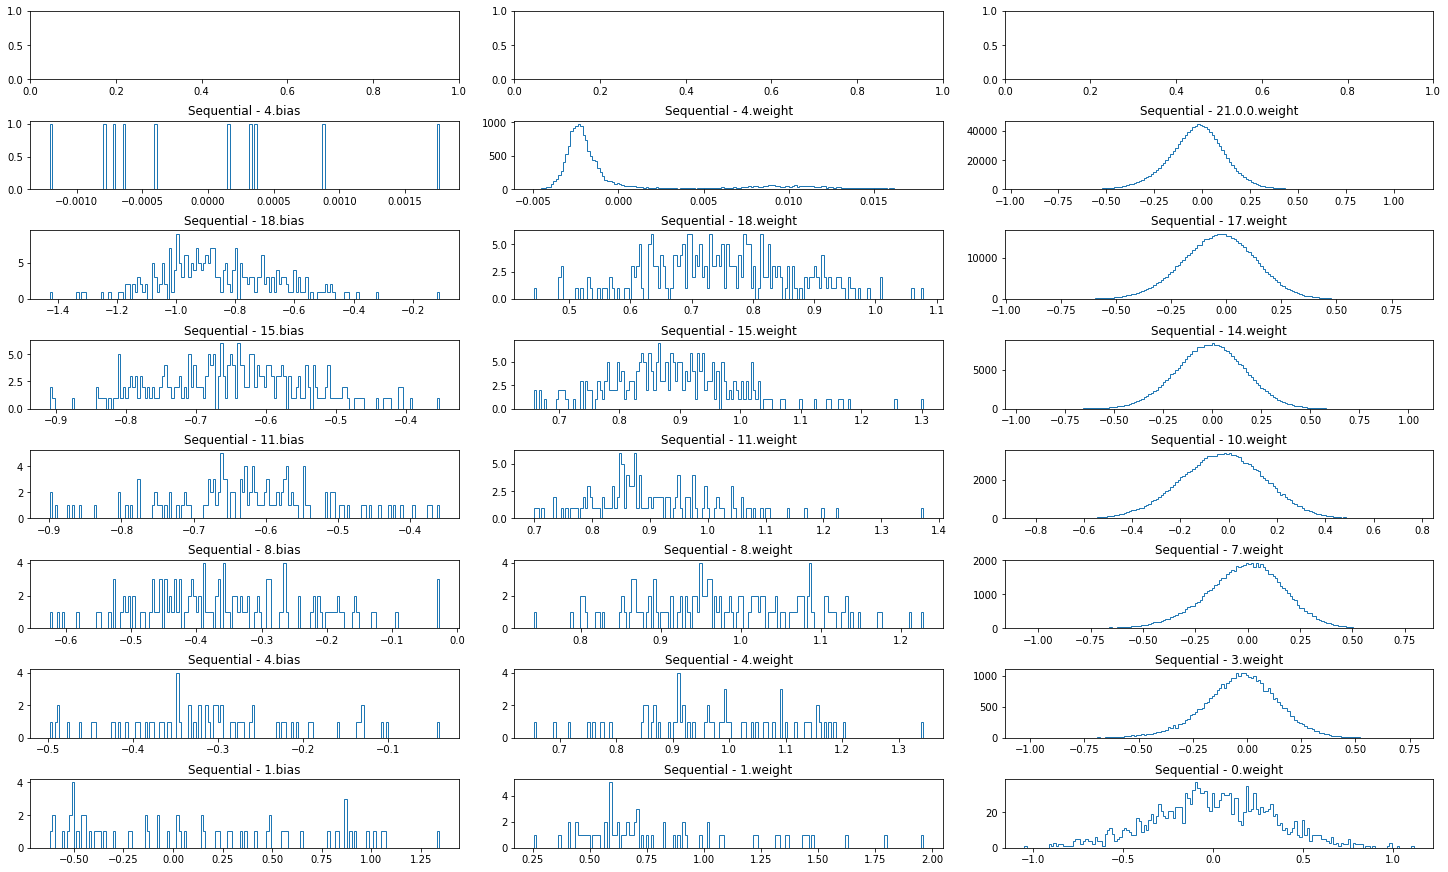

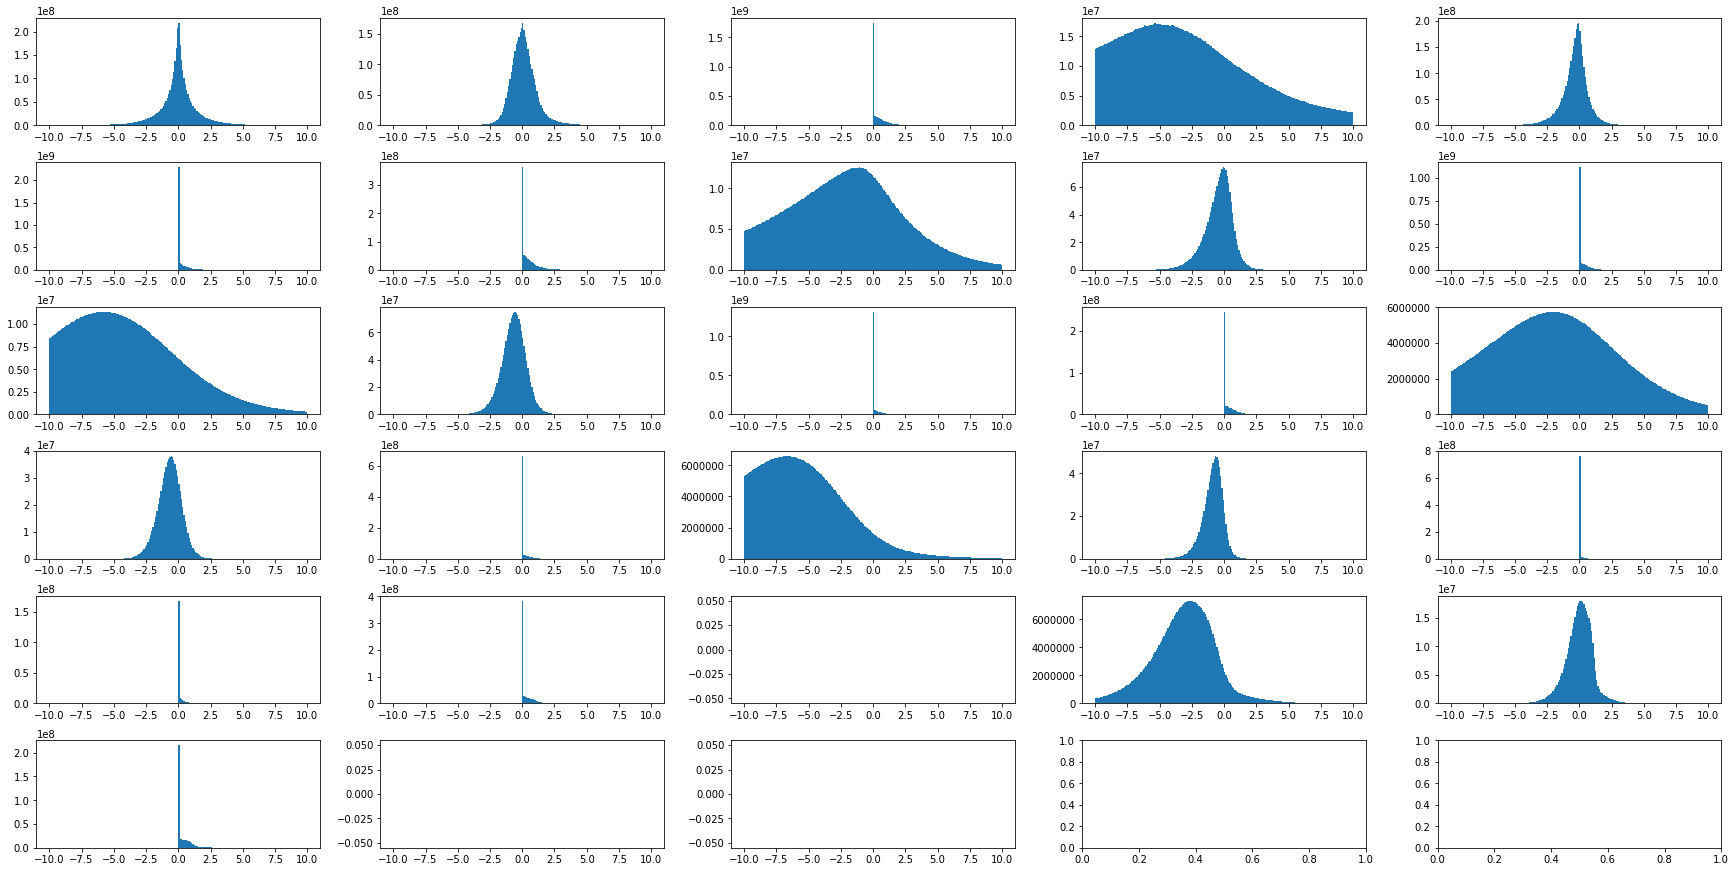

In [18]:
def plot_all_params(model):
    fig, axes_grid = plt.subplots(ncols=3, nrows=8, constrained_layout=True, figsize=(20.0, 12.0))
    axes_list = list(itertools.chain.from_iterable(axes_grid))

    for module in model.children():
        module_name = type(module).__name__

        for params_name, params in module.named_parameters():
            if params.numel() <= 0:
                continue
            axes = axes_list.pop()
            # ASSUMPTION: there's only one params tensor per module
            # We can generalize this later, but we assume that for now.
            axes.set_title(f"{module_name} - {params_name}")
            # ?????? check black magic here
            params_numpy = params.cpu().detach().numpy().flatten()
            # According to this `histtype="step"` plots faster: https://stackoverflow.com/a/39582304
            axes.hist(params_numpy, histtype="step", bins=160)
            
def plot_all_layer_outputs(layer_outputs):
    freq_fig, freq_axes_grid = plt.subplots(ncols=5, nrows=6, constrained_layout=True, figsize=(24.0, 12.0))
    freq_axes_list = list(itertools.chain.from_iterable(freq_axes_grid))

    for (index, layer_output) in enumerate(layer_outputs):
        freq_axes = freq_axes_list[index]
        cs231n.pytorch_train_best_model.plot_histogram(freq_axes, layer_output.cpu())            

def visualize_first_layer(model):
    first_module = next(model.children())
    # TODO: weights may not be first in the params list if there's a bias
    first_weights = next(first_module.parameters())

    weights_numpy = first_weights.cpu().detach().numpy()
    # Transpose to move color depth last
    grid = visualize_grid(weights_numpy.transpose(0, 2, 3, 1))
    # Squeeze in case the image only has 1 color channel.
    plt.imshow(grid.astype('uint8').squeeze())
    plt.axis('off')
    plt.gcf().set_size_inches(10, 10)
    plt.show()
# UNFINISHED
def visualize_second_layer(model):
    children_list = list(model.children())
    # TODO: weights may not be first in the params list if there's a bias
    first_weights = next(children_list[0].parameters())
    # Next conv layer. Net is Conv - BN - Relu - Conv - BN - Relu
    second_weights = next(children_list[3].parameters())
    print(first_weights.shape)
    print(second_weights.shape)

    # torch.tensordot(a, b, dims=([1, 0], [0, 1]))

    # weights_numpy = first_weights.cpu().detach().numpy()
    # # Transpose to move color depth last
    # grid = visualize_grid(weights_numpy.transpose(0, 2, 3, 1))
    # plt.imshow(grid.astype('uint8'))
    # plt.axis('off')
    # plt.gcf().set_size_inches(10, 10)
    # plt.show()

#train_results = model_results_cache[f"3x3_64_64_max2_128_128_max2_256_256_max2_(512+identity)_affine=False_glbmax+avg_BNaffine=False_relu_fc_batch32_dup0",
#                                TrainParams(l2_backbone=0,
#                                            l2_head=1,
#                                            optimizer="adam",
#                                            transform=get_transform_hflip_crop(p_crop=0.5, crop_size=(28, 28)),
#                                            lr_params=LRParams(init_lr=2e-3, step_size=5, gamma=0.5))]
BATCH_SIZE=32
i=0
train_results = model_results_cache[f"3x3_64_64_max2_128_128_max2_256_256_max2_512__glbmax+avg_BN_relu_fc_ALLBN(bias-only)_batch{BATCH_SIZE}_dup{i}",
                                TrainParams(l2_backbone=0,
                                            l2_head=1,
                                            optimizer="adam",
                                            transform=get_transform_hflip_crop(p_crop=0.5, crop_size=(28, 28)),
                                            lr_params=LRParams(init_lr=2e-3, step_size=5, gamma=0.5))]

index_of_best_val = index_of_max(train_results.val_accuracy_history)
plot_all_params(train_results.model_history[index_of_best_val])
# WARNING: currently layer_output_frequencies are computed from during **the last epoch of training**,
# so these won't be the layer output frequencies of the model selected by best validation error.
plot_all_layer_outputs(train_results.layer_output_frequencies)

In [4]:
train_results = model_results_cache["3x3_64_64_max2_128_128_max2_256_256_max2_512_affine=False_glbmax+avg_BNaffine=False_fc_batch32_dup0",
                    TrainParams(l2_backbone=0,
                                #l2_head=1,
                                l2_head=7.38905609893065,
                                transform=get_transform_hflip_crop(p_crop=0.5, crop_size=(28, 28)),
                                lr_params=LRParams(init_lr=2e-3, step_size=5, gamma=0.5))]

index_of_best_val = index_of_max(train_results.val_accuracy_history)
plot_all_params(train_results.model_history[index_of_best_val])
# WARNING: currently layer_output_frequencies are computed from during **the last epoch of training**,
# so these won't be the layer output frequencies of the model selected by best validation error.
plot_all_layer_outputs(train_results.layer_output_frequencies)

NameError: name 'LRParams' is not defined

In [61]:
train_results = model_results_cache["3x3_64_64_max2_128_128_max2_256_256_max2_512_affine=False_glbmax+avg_BNaffine=False_fc_batch32_dup1",
                    TrainParams(l2_backbone=0,
                                l2_head=1,
                                #l2_head=7.38905609893065,
                                transform=get_transform_hflip_crop(p_crop=0.5, crop_size=(28, 28)),
                                lr_params=LRParams(init_lr=2e-3, step_size=5, gamma=0.5))]

index_of_best_val = index_of_max(train_results.val_accuracy_history)
plot_all_params(train_results.model_history[index_of_best_val])
# WARNING: currently layer_output_frequencies are computed from during **the last epoch of training**,
# so these won't be the layer output frequencies of the model selected by best validation error.
plot_all_layer_outputs(train_results.layer_output_frequencies)

KeyError: ('3x3_64_64_max2_128_128_max2_256_256_max2_512_affine=False_glbmax+avg_BNaffine=False_fc_batch32_dup1', TrainParams(l2_backbone=0, l2_head=1, transform=Compose(
    RandomHorizontalFlip(p=0.5)
    RandomApply(
    p=0.5
    RandomCrop(size=(28, 28), padding=None)
    Resize(size=(32, 32), interpolation=PIL.Image.BILINEAR)
)
    ToTensor()
    Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
), lr_params=LRParams(init_lr=0.002, step_size=5, gamma=0.5)))

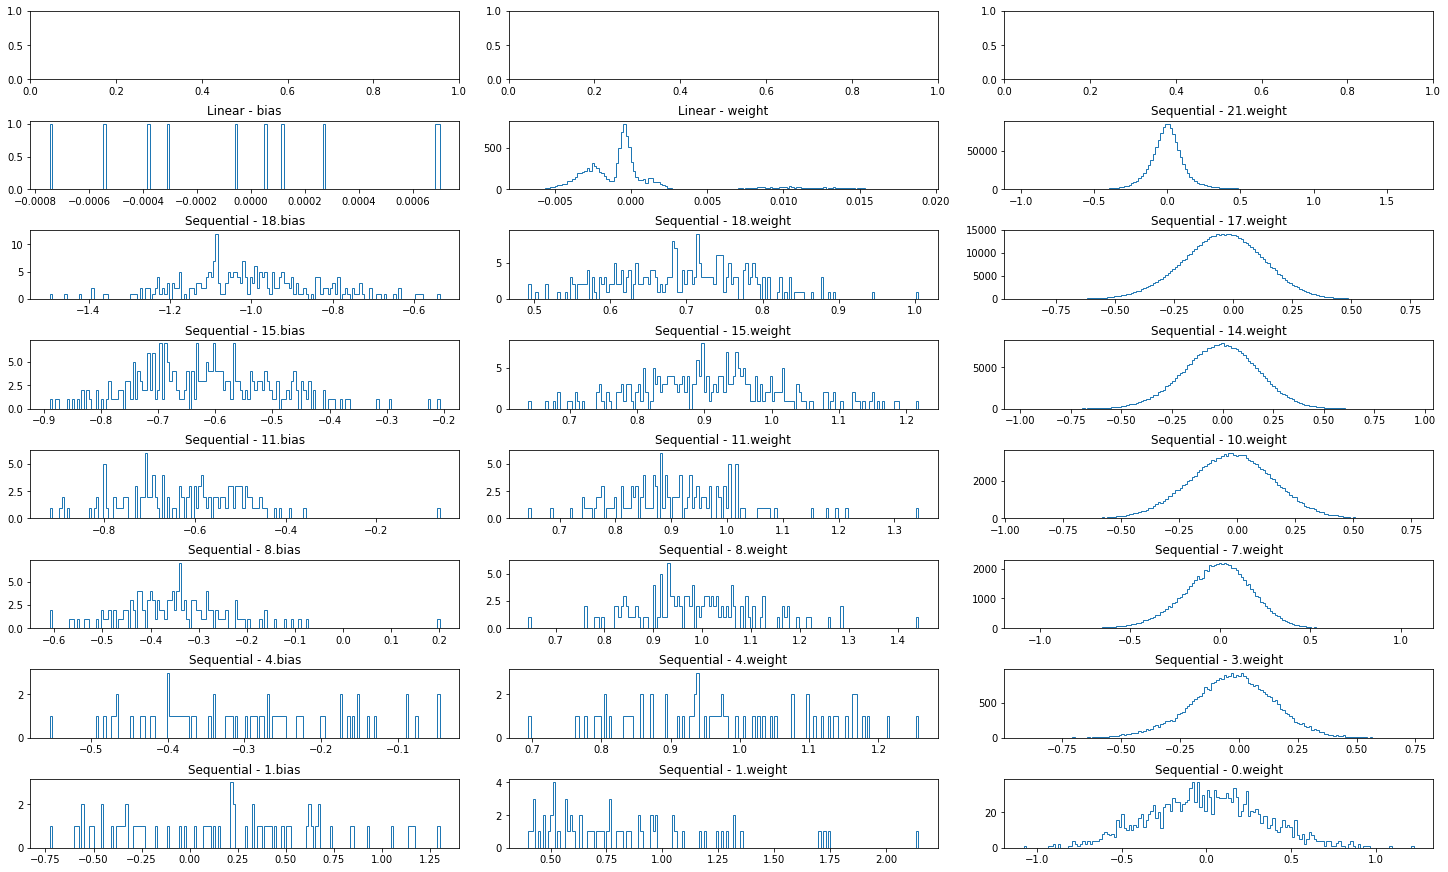

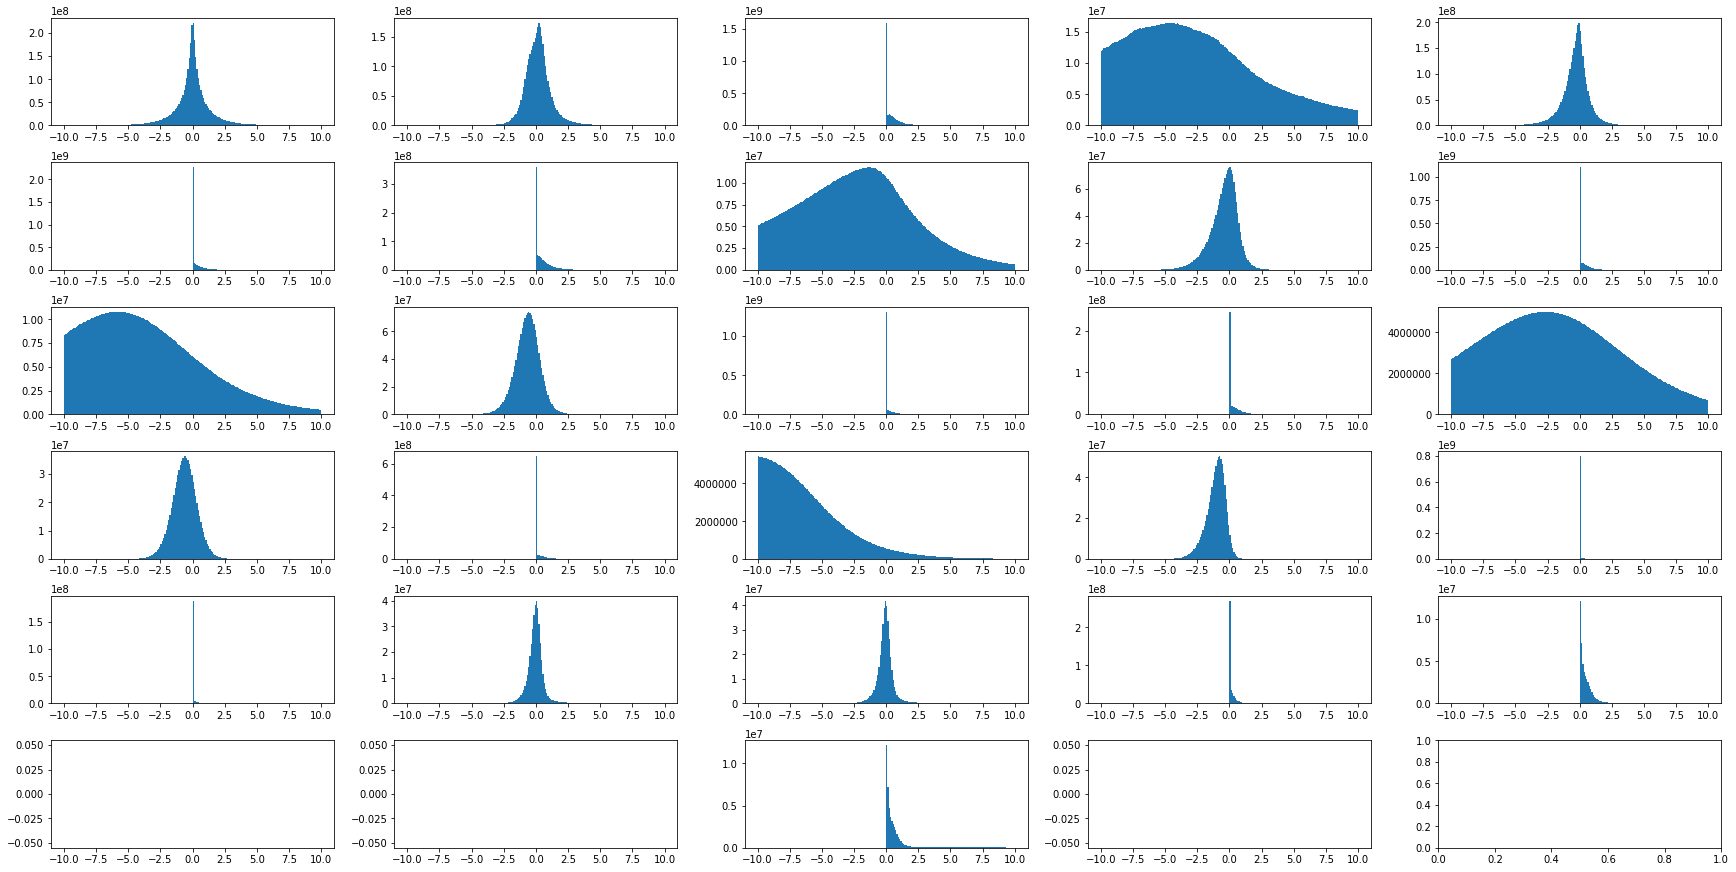

In [15]:
train_results = model_results_cache["3x3_64_64_max2_128_128_max2_256_256_max2_512_affine=False_glbmax+avg_fc_batch32",
                    TrainParams(l2_backbone=0,
                                l2_head=1,
                                #l2_head=7.38905609893065,
                                transform=get_transform_hflip_crop(p_crop=0.5, crop_size=(28, 28)),
                                lr_params=LRParams(init_lr=2e-3, step_size=5, gamma=0.5))]

index_of_best_val = index_of_max(train_results.val_accuracy_history)
plot_all_params(train_results.model_history[index_of_best_val])
# WARNING: currently layer_output_frequencies are computed from during **the last epoch of training**,
# so these won't be the layer output frequencies of the model selected by best validation error.
plot_all_layer_outputs(train_results.layer_output_frequencies)

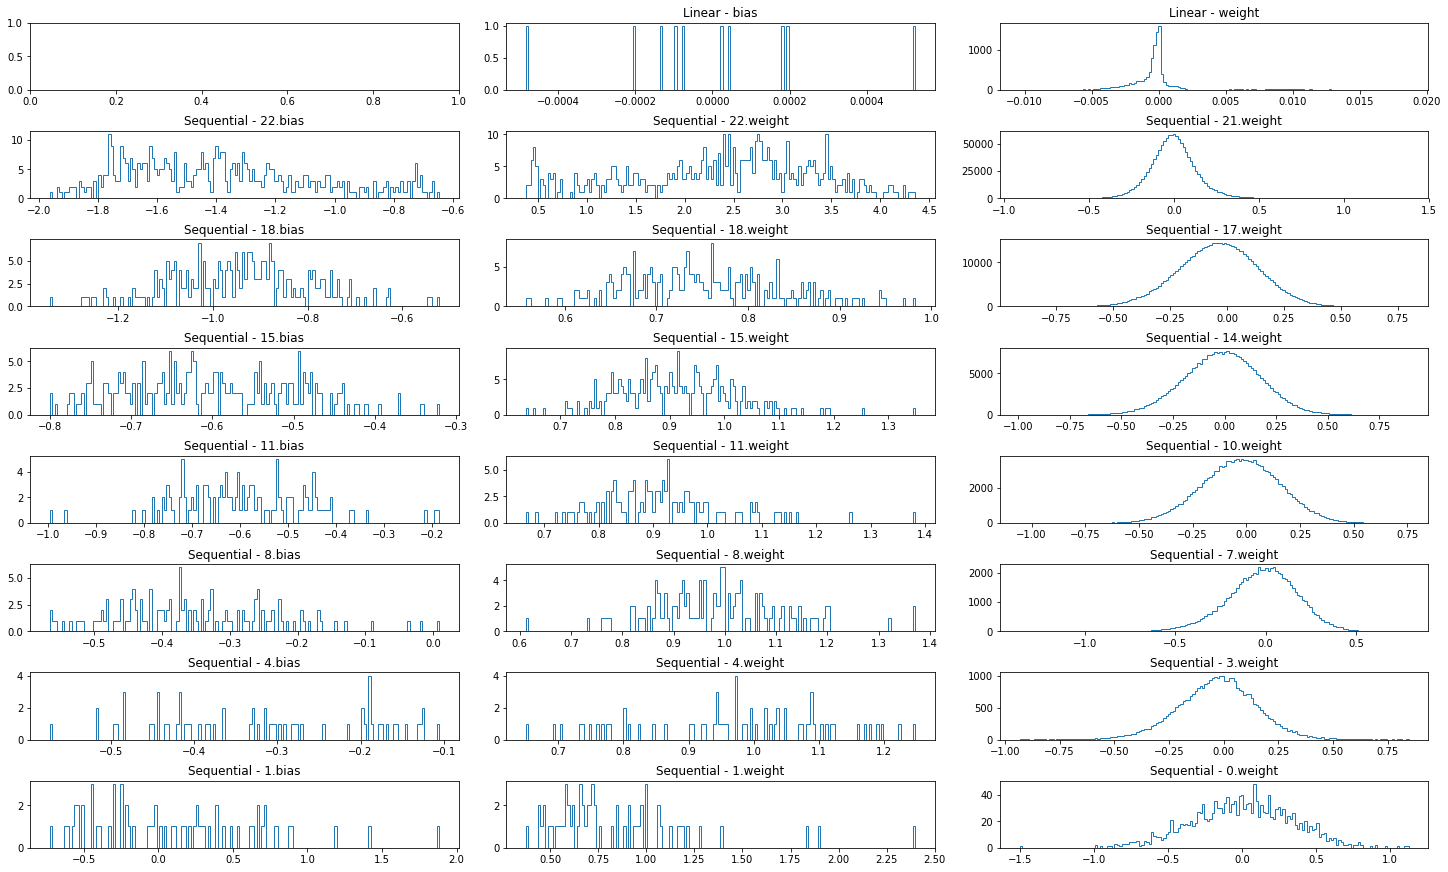

In [83]:
train_results = model_results_cache["3x3_64_64_max2_128_128_max2_256_256_max2_512_glbmax+avg_fc_batch32",
                    TrainParams(l2_backbone=0,
                                l2_head=1,
                                #l2_head=7.38905609893065,
                                transform=get_transform_hflip_crop(p_crop=0.5, crop_size=(28, 28)),
                                lr_params=LRParams(init_lr=2e-3, step_size=5, gamma=0.5))]

index_of_best_val = index_of_max(train_results.val_accuracy_history)
plot_all_params(train_results.model_history[index_of_best_val])

#plot_all_layer_outputs(train_results.layer_output_frequencies)

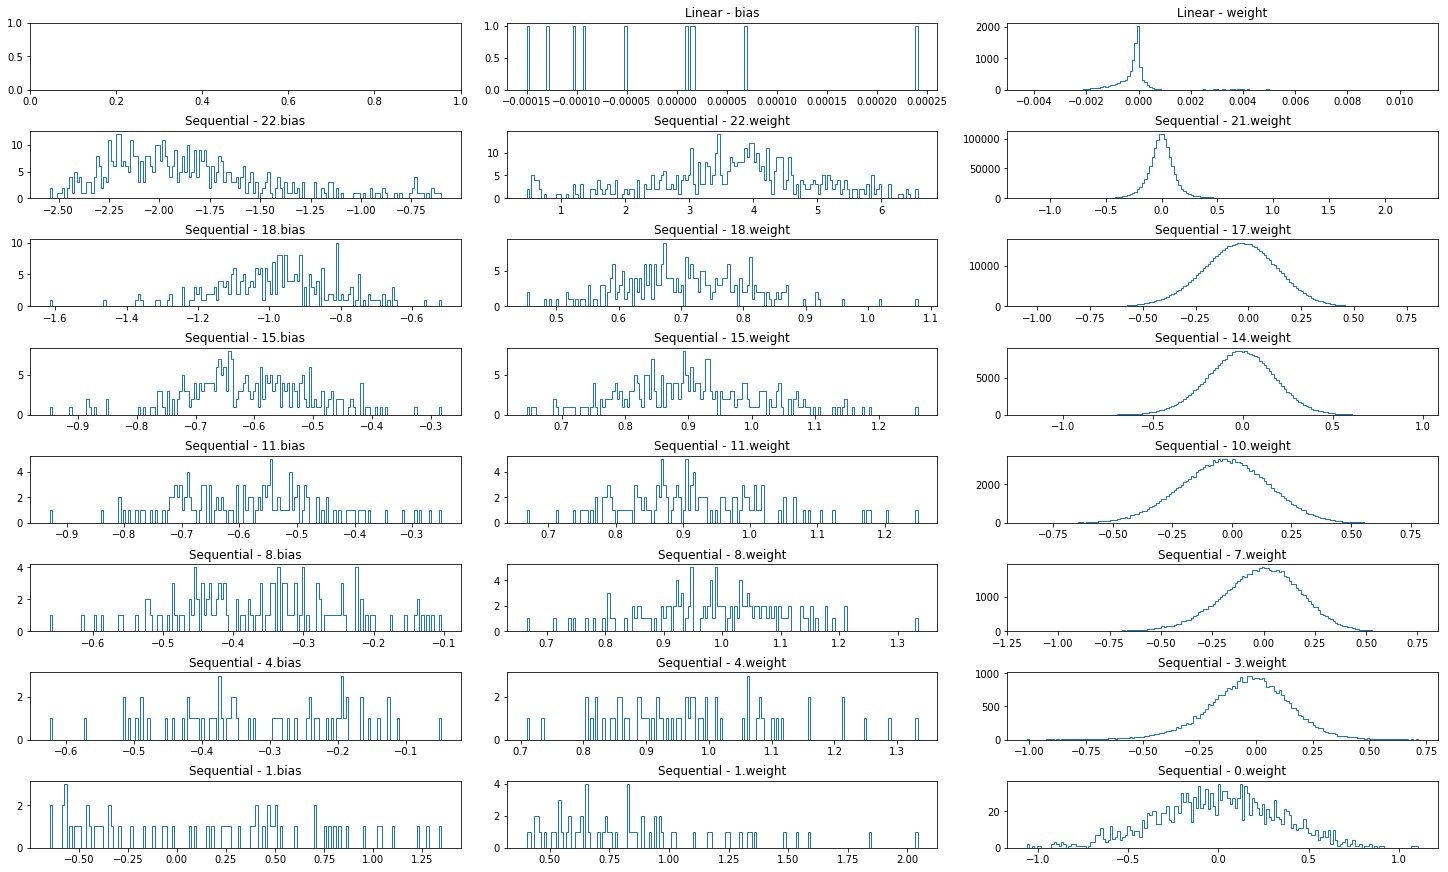

In [86]:
train_results = model_results_cache["3x3_64_64_max2_128_128_max2_256_256_max2_512_glbmax+avg_fc_batch32",
                    TrainParams(l2_backbone=0,
                                #l2_head=1,
                                l2_head=7.38905609893065,
                                transform=get_transform_hflip_crop(p_crop=0.5, crop_size=(28, 28)),
                                lr_params=LRParams(init_lr=2e-3, step_size=5, gamma=0.5))]I
index_of_best_val = index_of_max(train_results.val_accuracy_history)
plot_all_params(train_results.model_history[index_of_best_val])

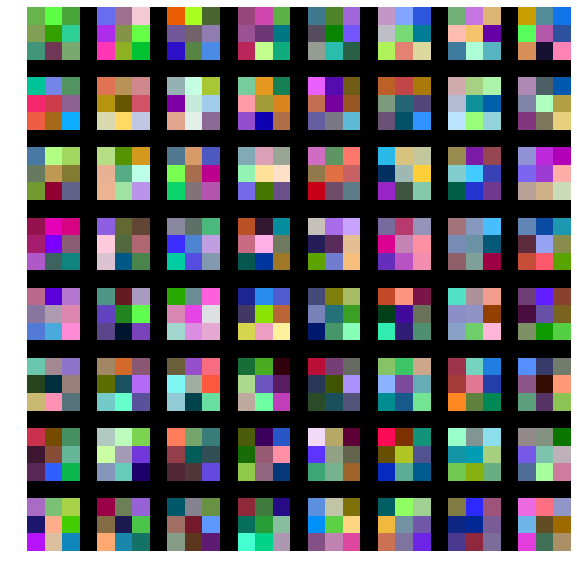

In [18]:
visualize_first_layer(train_results.model_history[-1])

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


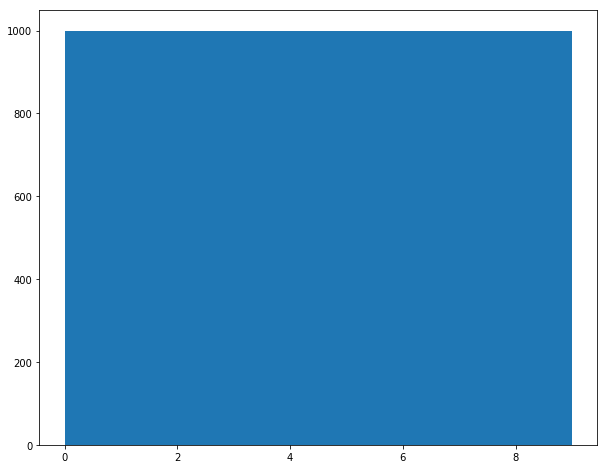

In [18]:
def show_split_distribution(dataloader):
    ys = []
    for x, y in dataloader:
        ys.extend(y)
    plt.hist(np.array(ys))
    #return ys    
num_val = 10000    
dataloaders = get_dataloaders(transform=std_transform, num_train=50000-num_val, num_val=num_val)
#show_split_distribution(dataloaders["train_non_augmented"])
#show_split_distribution(dataloaders["train_augmented"])
#show_split_distribution(dataloaders["val_1"])
#show_split_distribution(dataloaders["val_2"])
show_split_distribution(dataloaders["val_all"])
#show_split_distribution(dataloaders["test"])